In [1]:
import pandas as pd
import numpy as np
import re
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 
%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [3]:
data = pd.read_csv('/Users/dchrobak/Desktop/NFL_Fantasy_Fiie.csv')

In [4]:
data.describe

<bound method NDFrame.describe of       Year    RK     ID                         NAME TEAM       SALARY  POS  \
0     2021   853  15478                   A.J. Bouye  CAR   3380556.00   CB   
1     2017    59  15478                   A.J. Bouye  JAX  13500000.00   CB   
2     2016    45  15478                   A.J. Bouye  HOU   1671000.00   CB   
3     2015   307  15478                   A.J. Bouye  HOU    672028.00   CB   
4     2020    98  21042                   A.J. Brown  TEN    751926.00   WR   
5     2019   160  21042                   A.J. Brown  TEN   2625812.00   WR   
6     2021   938  21881                 A.J. Epenesa  BUF   2619050.00   DE   
7     2020   231  21881                 A.J. Epenesa  BUF   2619050.00   DE   
8     2021   258  12845                   A.J. Green  ARI   7250000.00   WR   
9     2021   878  22046                   A.J. Green  CLE   7250000.00   CB   
10    2020   434  22046                   A.J. Green  CLE  18196490.00   CB   
11    2015    94  

In [5]:
data.columns

Index(['Year', 'RK', 'ID', 'NAME', 'TEAM', 'SALARY', 'POS', 'GMS', 'PASS_YDS',
       'PASS_TD', 'PASS_INT', 'RUSH_YDS', 'RUSH_TD', 'RUSH_REC', 'REC_YDS',
       'REC_TD', 'DEF_SCK', 'DEF_INT', 'DEF_FF', 'DEF_FR', 'FPTS_G', 'FPTS'],
      dtype='object')

In [6]:
data.head()

Year   RK     ID        NAME TEAM       SALARY POS  GMS  PASS_YDS  PASS_TD  \
0  2021  853  15478  A.J. Bouye  CAR   3380556.00  CB   10         0        0   
1  2017   59  15478  A.J. Bouye  JAX  13500000.00  CB    3         0        0   
2  2016   45  15478  A.J. Bouye  HOU   1671000.00  CB    2         0        0   
3  2015  307  15478  A.J. Bouye  HOU    672028.00  CB    1         0        0   
4  2020   98  21042  A.J. Brown  TEN    751926.00  WR    1         0        0   

   PASS_INT  RUSH_YDS  RUSH_TD  RUSH_REC  REC_YDS  REC_TD  DEF_SCK  DEF_INT  \
0       0.0         0        0         0        0       0      0.0        0   
1       0.0         0        0         0        0       0      0.0        0   
2       0.0         0        0         0        0       0      0.0        2   
3       0.0         0        0         0        0       0      0.0        0   
4       0.0         0        0         6       83       1      0.0        0   

   DEF_FF  DEF_FR  FPTS_G  FPTS  
0       1       0     3.4  33.5  
1       0       0     5.7  17.0  
2       1       0    10.5  21.0  
3       0       0     1.0   1.0  
4       0       0    14.3  14.3

In [7]:
data['POS'].unique()

array(['CB', 'WR', 'DE', 'OLB', 'SS', 'LS', 'DT', 'RB', 'FB', 'QB', 'DL',
       'NT', 'TE', 'K', 'FS', 'ILB', 'LB', 'S', 'DB'], dtype=object)

In [8]:
data = data.rename(columns=str.lower)

In [9]:
data.head()

year   rk     id        name team       salary pos  gms  pass_yds  pass_td  \
0  2021  853  15478  A.J. Bouye  CAR   3380556.00  CB   10         0        0   
1  2017   59  15478  A.J. Bouye  JAX  13500000.00  CB    3         0        0   
2  2016   45  15478  A.J. Bouye  HOU   1671000.00  CB    2         0        0   
3  2015  307  15478  A.J. Bouye  HOU    672028.00  CB    1         0        0   
4  2020   98  21042  A.J. Brown  TEN    751926.00  WR    1         0        0   

   pass_int  rush_yds  rush_td  rush_rec  rec_yds  rec_td  def_sck  def_int  \
0       0.0         0        0         0        0       0      0.0        0   
1       0.0         0        0         0        0       0      0.0        0   
2       0.0         0        0         0        0       0      0.0        2   
3       0.0         0        0         0        0       0      0.0        0   
4       0.0         0        0         6       83       1      0.0        0   

   def_ff  def_fr  fpts_g  fpts  
0       1       0     3.4  33.5  
1       0       0     5.7  17.0  
2       1       0    10.5  21.0  
3       0       0     1.0   1.0  
4       0       0    14.3  14.3

In [10]:
data['year'].unique()

array([2021, 2017, 2016, 2015, 2020, 2019, 2018, 2014])

In [11]:
data.isna().sum()

year        0
rk          0
id          0
name        0
team        0
salary      0
pos         0
gms         0
pass_yds    0
pass_td     0
pass_int    1
rush_yds    0
rush_td     0
rush_rec    0
rec_yds     0
rec_td      0
def_sck     0
def_int     0
def_ff      0
def_fr      0
fpts_g      0
fpts        0
dtype: int64

In [12]:
data = data.dropna()

In [13]:
data.isna().sum()

year        0
rk          0
id          0
name        0
team        0
salary      0
pos         0
gms         0
pass_yds    0
pass_td     0
pass_int    0
rush_yds    0
rush_td     0
rush_rec    0
rec_yds     0
rec_td      0
def_sck     0
def_int     0
def_ff      0
def_fr      0
fpts_g      0
fpts        0
dtype: int64

In [14]:
data.head()

year   rk     id        name team       salary pos  gms  pass_yds  pass_td  \
0  2021  853  15478  A.J. Bouye  CAR   3380556.00  CB   10         0        0   
1  2017   59  15478  A.J. Bouye  JAX  13500000.00  CB    3         0        0   
2  2016   45  15478  A.J. Bouye  HOU   1671000.00  CB    2         0        0   
3  2015  307  15478  A.J. Bouye  HOU    672028.00  CB    1         0        0   
4  2020   98  21042  A.J. Brown  TEN    751926.00  WR    1         0        0   

   pass_int  rush_yds  rush_td  rush_rec  rec_yds  rec_td  def_sck  def_int  \
0       0.0         0        0         0        0       0      0.0        0   
1       0.0         0        0         0        0       0      0.0        0   
2       0.0         0        0         0        0       0      0.0        2   
3       0.0         0        0         0        0       0      0.0        0   
4       0.0         0        0         6       83       1      0.0        0   

   def_ff  def_fr  fpts_g  fpts  
0       1       0     3.4  33.5  
1       0       0     5.7  17.0  
2       1       0    10.5  21.0  
3       0       0     1.0   1.0  
4       0       0    14.3  14.3

In [15]:
data.drop(['id', 'salary'], axis=1, inplace=True)

In [16]:
data.head()

year   rk        name team pos  gms  pass_yds  pass_td  pass_int  rush_yds  \
0  2021  853  A.J. Bouye  CAR  CB   10         0        0       0.0         0   
1  2017   59  A.J. Bouye  JAX  CB    3         0        0       0.0         0   
2  2016   45  A.J. Bouye  HOU  CB    2         0        0       0.0         0   
3  2015  307  A.J. Bouye  HOU  CB    1         0        0       0.0         0   
4  2020   98  A.J. Brown  TEN  WR    1         0        0       0.0         0   

   rush_td  rush_rec  rec_yds  rec_td  def_sck  def_int  def_ff  def_fr  \
0        0         0        0       0      0.0        0       1       0   
1        0         0        0       0      0.0        0       0       0   
2        0         0        0       0      0.0        2       1       0   
3        0         0        0       0      0.0        0       0       0   
4        0         6       83       1      0.0        0       0       0   

   fpts_g  fpts  
0     3.4  33.5  
1     5.7  17.0  
2    10.5  21.0  
3     1.0   1.0  
4    14.3  14.3

In [17]:
data.dtypes

year          int64
rk            int64
name         object
team         object
pos          object
gms           int64
pass_yds      int64
pass_td       int64
pass_int    float64
rush_yds      int64
rush_td       int64
rush_rec      int64
rec_yds       int64
rec_td        int64
def_sck     float64
def_int       int64
def_ff        int64
def_fr        int64
fpts_g      float64
fpts        float64
dtype: object

In [18]:
data.value_counts()

year  rk    name                         team  pos  gms  pass_yds  pass_td  pass_int  rush_yds  rush_td  rush_rec  rec_yds  rec_td  def_sck  def_int  def_ff  def_fr  fpts_g  fpts   
2014  1     Tom Brady                    NE    QB   3    921       10       4.0        10       1        0          0       0       0.0      0        0       0        25.3    75.84     1
2020  103   Leonard Floyd                LAR   OLB  2    0         0        0.0        0        0        0          0       0       2.0      0        0       0        6.9     13.80     1
      104   Jaire Alexander              GB    CB   2    0         0        0.0        0        0        0          0       0       0.0      2        0       0        6.8     13.50     1
      107   Michael Thomas               NO    WR   2    0         0        0.0        0        0        5          73      1       0.0      0        0       0        6.6     13.30     1
      108   Justin Tucker                BAL   K    2    0         0  

In [19]:
data.count()

year        3922
rk          3922
name        3922
team        3922
pos         3922
gms         3922
pass_yds    3922
pass_td     3922
pass_int    3922
rush_yds    3922
rush_td     3922
rush_rec    3922
rec_yds     3922
rec_td      3922
def_sck     3922
def_int     3922
def_ff      3922
def_fr      3922
fpts_g      3922
fpts        3922
dtype: int64

In [20]:
data.count('columns')

0       20
1       20
2       20
3       20
4       20
5       20
6       20
7       20
8       20
9       20
10      20
11      20
12      20
13      20
14      20
15      20
16      20
17      20
18      20
19      20
20      20
21      20
22      20
23      20
24      20
25      20
26      20
27      20
28      20
29      20
30      20
31      20
32      20
33      20
34      20
35      20
36      20
37      20
38      20
39      20
40      20
41      20
42      20
43      20
44      20
45      20
46      20
47      20
48      20
49      20
50      20
51      20
52      20
53      20
54      20
55      20
56      20
57      20
58      20
59      20
60      20
61      20
62      20
63      20
64      20
65      20
66      20
67      20
68      20
69      20
70      20
71      20
72      20
73      20
74      20
75      20
76      20
77      20
78      20
79      20
80      20
81      20
82      20
83      20
84      20
85      20
86      20
87      20
88      20
89      20
90      20

### After reviewing the model it was neccesary to drop corrolated columns in order to achieve better accuracy

In [21]:
data.reset_index(drop = True, inplace = True)

In [22]:
data.head()

year   rk        name team pos  gms  pass_yds  pass_td  pass_int  rush_yds  \
0  2021  853  A.J. Bouye  CAR  CB   10         0        0       0.0         0   
1  2017   59  A.J. Bouye  JAX  CB    3         0        0       0.0         0   
2  2016   45  A.J. Bouye  HOU  CB    2         0        0       0.0         0   
3  2015  307  A.J. Bouye  HOU  CB    1         0        0       0.0         0   
4  2020   98  A.J. Brown  TEN  WR    1         0        0       0.0         0   

   rush_td  rush_rec  rec_yds  rec_td  def_sck  def_int  def_ff  def_fr  \
0        0         0        0       0      0.0        0       1       0   
1        0         0        0       0      0.0        0       0       0   
2        0         0        0       0      0.0        2       1       0   
3        0         0        0       0      0.0        0       0       0   
4        0         6       83       1      0.0        0       0       0   

   fpts_g  fpts  
0     3.4  33.5  
1     5.7  17.0  
2    10.5  21.0  
3     1.0   1.0  
4    14.3  14.3

In [23]:
data.shape

(3922, 20)

In [24]:
numericals = data.select_dtypes(include = np.number)
categoricals = data.select_dtypes(include = np.object)

In [25]:
numericals.head()

year   rk  gms  pass_yds  pass_td  pass_int  rush_yds  rush_td  rush_rec  \
0  2021  853   10         0        0       0.0         0        0         0   
1  2017   59    3         0        0       0.0         0        0         0   
2  2016   45    2         0        0       0.0         0        0         0   
3  2015  307    1         0        0       0.0         0        0         0   
4  2020   98    1         0        0       0.0         0        0         6   

   rec_yds  rec_td  def_sck  def_int  def_ff  def_fr  fpts_g  fpts  
0        0       0      0.0        0       1       0     3.4  33.5  
1        0       0      0.0        0       0       0     5.7  17.0  
2        0       0      0.0        2       1       0    10.5  21.0  
3        0       0      0.0        0       0       0     1.0   1.0  
4       83       1      0.0        0       0       0    14.3  14.3

In [26]:
categoricals.head()

name team pos
0  A.J. Bouye  CAR  CB
1  A.J. Bouye  JAX  CB
2  A.J. Bouye  HOU  CB
3  A.J. Bouye  HOU  CB
4  A.J. Brown  TEN  WR

In [27]:
numericals.shape

(3922, 17)

In [28]:
categoricals.shape

(3922, 3)

In [29]:
for column_name in data.columns:
    print (column_name)

year
rk
name
team
pos
gms
pass_yds
pass_td
pass_int
rush_yds
rush_td
rush_rec
rec_yds
rec_td
def_sck
def_int
def_ff
def_fr
fpts_g
fpts


In [30]:
numericals.isna().sum()

year        0
rk          0
gms         0
pass_yds    0
pass_td     0
pass_int    0
rush_yds    0
rush_td     0
rush_rec    0
rec_yds     0
rec_td      0
def_sck     0
def_int     0
def_ff      0
def_fr      0
fpts_g      0
fpts        0
dtype: int64

In [31]:
categoricals.isna().sum()

name    0
team    0
pos     0
dtype: int64

In [32]:
# Dropping Name it was producing a negative R2

<!-- I dropped 'name' here. There were too many values in the column, alover 2000, it was prodcing a -R2.  -->

In [33]:
data.drop(['name'], axis=1, inplace=True)

In [34]:
numericals.corr()

year        rk       gms  pass_yds   pass_td  pass_int  \
year      1.000000  0.456605  0.602742  0.101548  0.095862  0.097983   
rk        0.456605  1.000000  0.344484 -0.097090 -0.095818 -0.085395   
gms       0.602742  0.344484  1.000000  0.168306  0.164743  0.158072   
pass_yds  0.101548 -0.097090  0.168306  1.000000  0.963931  0.928370   
pass_td   0.095862 -0.095818  0.164743  0.963931  1.000000  0.851325   
pass_int  0.097983 -0.085395  0.158072  0.928370  0.851325  1.000000   
rush_yds  0.130109 -0.093736  0.200812  0.190779  0.173124  0.202104   
rush_td   0.120782 -0.097806  0.184814  0.212133  0.194161  0.217028   
rush_rec  0.209377 -0.049561  0.358400 -0.030188 -0.005245 -0.031603   
rec_yds   0.193607 -0.060830  0.336083 -0.028617 -0.000931 -0.029899   
rec_td    0.165516 -0.075855  0.294824 -0.024136  0.006492 -0.025998   
def_sck   0.200570 -0.032689  0.357487 -0.030250 -0.028286 -0.030176   
def_int   0.160871 -0.029428  0.302618 -0.026274 -0.024568 -0.026210   
def_ff    0.175682 -0.015321  0.328068 -0.028136 -0.026319 -0.028078   
def_fr    0.152601  0.003317  0.293766 -0.026593 -0.025080 -0.026756   
fpts_g    0.044244 -0.435638  0.113802  0.337397  0.339797  0.296431   
fpts      0.410873 -0.131108  0.708304  0.536125  0.545058  0.482938   

          rush_yds   rush_td  rush_rec   rec_yds    rec_td   def_sck  \
year      0.130109  0.120782  0.209377  0.193607  0.165516  0.200570   
rk       -0.093736 -0.097806 -0.049561 -0.060830 -0.075855 -0.032689   
gms       0.200812  0.184814  0.358400  0.336083  0.294824  0.357487   
pass_yds  0.190779  0.212133 -0.030188 -0.028617 -0.024136 -0.030250   
pass_td   0.173124  0.194161 -0.005245 -0.000931  0.006492 -0.028286   
pass_int  0.202104  0.217028 -0.031603 -0.029899 -0.025998 -0.030176   
rush_yds  1.000000  0.875531  0.300464  0.196861  0.168303 -0.041383   
rush_td   0.875531  1.000000  0.270994  0.188727  0.160834 -0.038127   
rush_rec  0.300464  0.270994  1.000000  0.971379  0.850023 -0.067122   
rec_yds   0.196861  0.188727  0.971379  1.000000  0.876270 -0.063353   
rec_td    0.168303  0.160834  0.850023  0.876270  1.000000 -0.053446   
def_sck  -0.041383 -0.038127 -0.067122 -0.063353 -0.053446  1.000000   
def_int  -0.035733 -0.033117 -0.058373 -0.055033 -0.047257  0.058223   
def_ff   -0.037699 -0.034756 -0.058424 -0.054315 -0.045812  0.561564   
def_fr   -0.032629 -0.027183 -0.052179 -0.049258 -0.039025  0.297648   
fpts_g    0.297139  0.314076  0.220901  0.224434  0.240602  0.136828   
fpts      0.457628  0.458137  0.457941  0.444632  0.424942  0.336542   

           def_int    def_ff    def_fr    fpts_g      fpts  
year      0.160871  0.175682  0.152601  0.044244  0.410873  
rk       -0.029428 -0.015321  0.003317 -0.435638 -0.131108  
gms       0.302618  0.328068  0.293766  0.113802  0.708304  
pass_yds -0.026274 -0.028136 -0.026593  0.337397  0.536125  
pass_td  -0.024568 -0.026319 -0.025080  0.339797  0.545058  
pass_int -0.026210 -0.028078 -0.026756  0.296431  0.482938  
rush_yds -0.035733 -0.037699 -0.032629  0.297139  0.457628  
rush_td  -0.033117 -0.034756 -0.027183  0.314076  0.458137  
rush_rec -0.058373 -0.058424 -0.052179  0.220901  0.457941  
rec_yds  -0.055033 -0.054315 -0.049258  0.224434  0.444632  
rec_td   -0.047257 -0.045812 -0.039025  0.240602  0.424942  
def_sck   0.058223  0.561564  0.297648  0.136828  0.336542  
def_int   1.000000  0.192268  0.244399  0.104284  0.268065  
def_ff    0.192268  1.000000  0.307419  0.119574  0.301622  
def_fr    0.244399  0.307419  1.000000  0.096099  0.245699  
fpts_g    0.104284  0.119574  0.096099  1.000000  0.514923  
fpts      0.268065  0.301622  0.245699  0.514923  1.000000

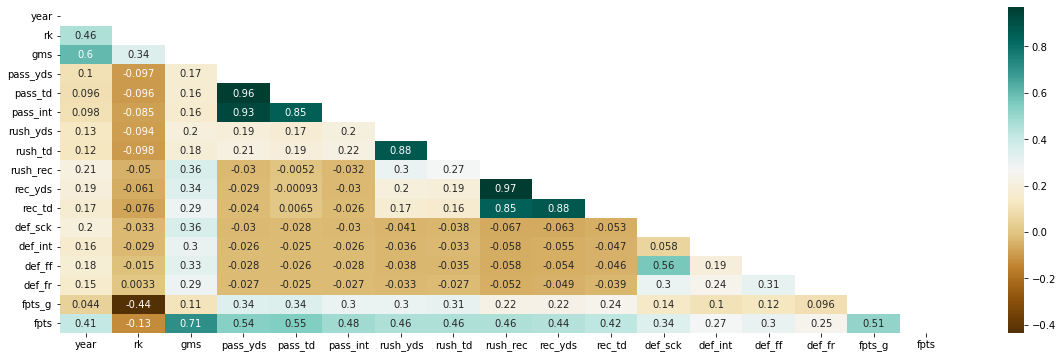

In [35]:
correlations_matrix = numericals.corr()
mask = np.triu(np.ones_like(numericals.corr(), dtype=bool))
fig, ax = plt.subplots(figsize= (20, 6))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap= 'BrBG')
plt.show()

## Originally I had included passing yards here as well as part of my collumn drop. However after getting a near perfect model, it was clear the model was overfitting. I added passing yards

In [36]:
data.drop(['pass_td', 'rush_td', 'rec_yds', 'rec_td'], axis=1, inplace=True),

(None,)

In [37]:
data.reset_index(drop = True, inplace = True)

In [38]:
data.head()

year   rk team pos  gms  pass_yds  pass_int  rush_yds  rush_rec  def_sck  \
0  2021  853  CAR  CB   10         0       0.0         0         0      0.0   
1  2017   59  JAX  CB    3         0       0.0         0         0      0.0   
2  2016   45  HOU  CB    2         0       0.0         0         0      0.0   
3  2015  307  HOU  CB    1         0       0.0         0         0      0.0   
4  2020   98  TEN  WR    1         0       0.0         0         6      0.0   

   def_int  def_ff  def_fr  fpts_g  fpts  
0        0       1       0     3.4  33.5  
1        0       0       0     5.7  17.0  
2        2       1       0    10.5  21.0  
3        0       0       0     1.0   1.0  
4        0       0       0    14.3  14.3

In [39]:
data_t = data.describe()

In [40]:
data_t.transpose()

count         mean         std      min      25%     50%       75%  \
year      3922.0  2017.964814    2.438802  2014.00  2016.00  2018.0  2020.000   
rk        3922.0   350.828404  348.767077     1.00   141.25   279.0   366.000   
gms       3922.0     4.275880    5.164015     1.00     1.00     2.0     3.000   
pass_yds  3922.0    40.515808  333.408088     0.00     0.00     0.0     0.000   
pass_int  3922.0     0.130546    1.076891     0.00     0.00     0.0     0.000   
rush_yds  3922.0    13.713666   82.471464    -9.00     0.00     0.0     0.000   
rush_rec  3922.0     2.933197   10.864571     0.00     0.00     0.0     0.000   
def_sck   3922.0     0.316165    1.270429     0.00     0.00     0.0     0.000   
def_int   3922.0     0.106323    0.491878     0.00     0.00     0.0     0.000   
def_ff    3922.0     0.104539    0.451453     0.00     0.00     0.0     0.000   
def_fr    3922.0     0.065018    0.294652     0.00     0.00     0.0     0.000   
fpts_g    3922.0     4.061270    4.521243    -4.70     0.50     2.8     6.000   
fpts      3922.0    20.018988   38.389489    -4.66     1.00     6.0    18.575   

              max  
year      2021.00  
rk        1918.00  
gms         17.00  
pass_yds  5316.00  
pass_int    17.00  
rush_yds  1811.00  
rush_rec   145.00  
def_sck     22.50  
def_int     11.00  
def_ff       8.00  
def_fr       3.00  
fpts_g      36.40  
fpts       380.76

In [41]:
iqrlist = list(data.select_dtypes('number').columns)

In [42]:
for i in iqrlist:
    IQR = np.percentile(data[i], 75) - np.percentile(data[i], 25)
    upper_limit = np.percentile(data[i],75)+1.5*IQR
    lower_limit = np.percentile(data[i],25)-1.5*IQR

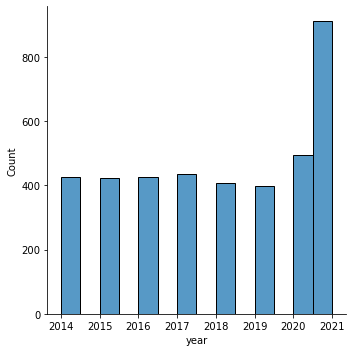

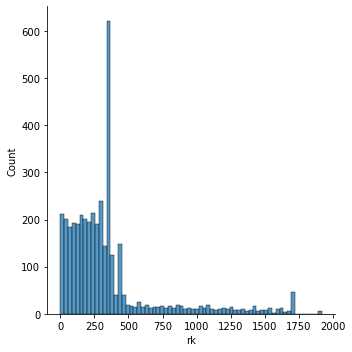

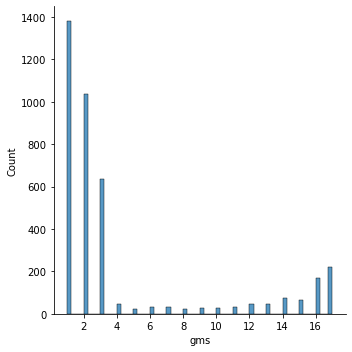

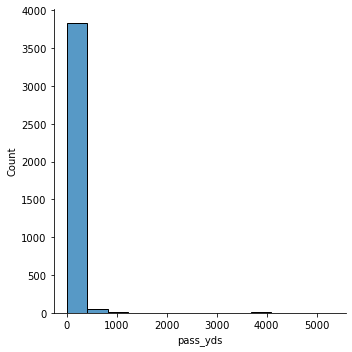

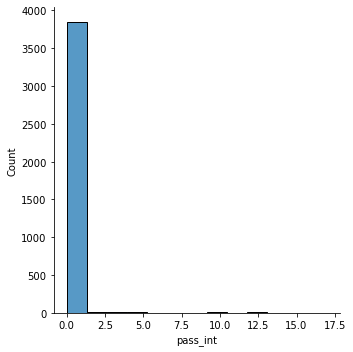

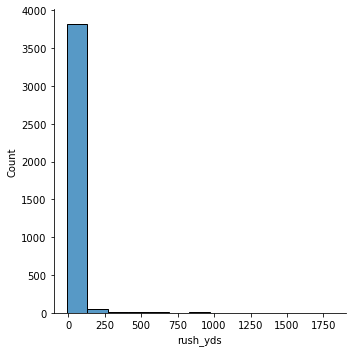

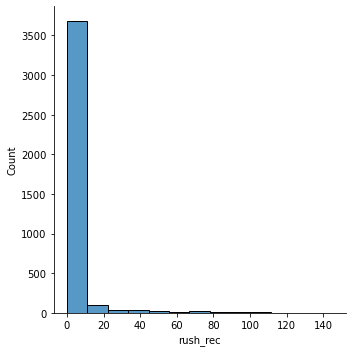

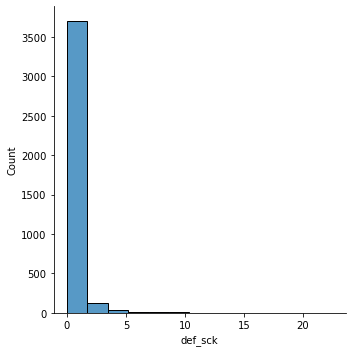

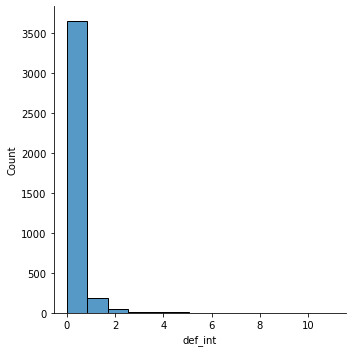

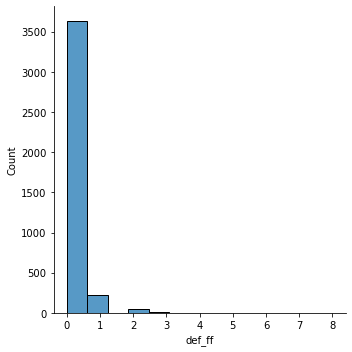

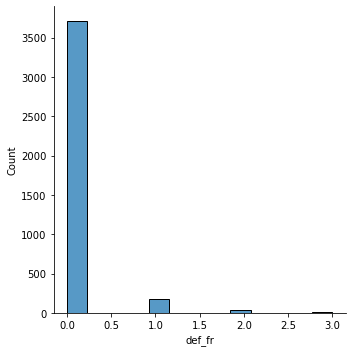

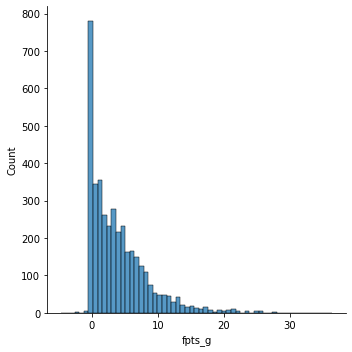

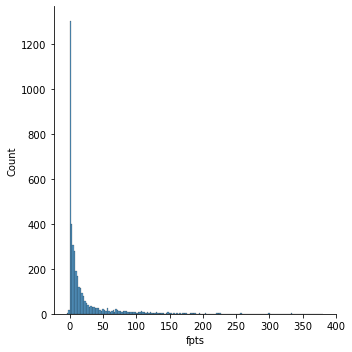

In [43]:
for i in iqrlist:
    sns.displot(data[i])

In [44]:
for i in list(data.select_dtypes('number').columns):
        print(i + ': ' + str(data[i].value_counts().values[0]/data[i].value_counts().values.sum()))

year: 0.23227944926058133
rk: 0.034166241713411524
gms: 0.35211626721060685
pass_yds: 0.9581845996940337
pass_int: 0.9722080571137175
rush_yds: 0.8546659867414584
rush_rec: 0.7695053544110148
def_sck: 0.8684344722080571
def_int: 0.9309026007139215
def_ff: 0.9258031616522182
def_fr: 0.9464558898521163
fpts_g: 0.1891891891891892
fpts: 0.18663946965833758


In [53]:
for i in list(data.select_dtypes('number').columns):
    if data[i].value_counts().values[0]/data[i].value_counts().values.sum() > .95:
        print(i + ': ' + str(data[i].value_counts().values[0]/data[i].value_counts().values.sum()))
    else:
        continue

pass_yds: 0.9581845996940337
pass_int: 0.9722080571137175


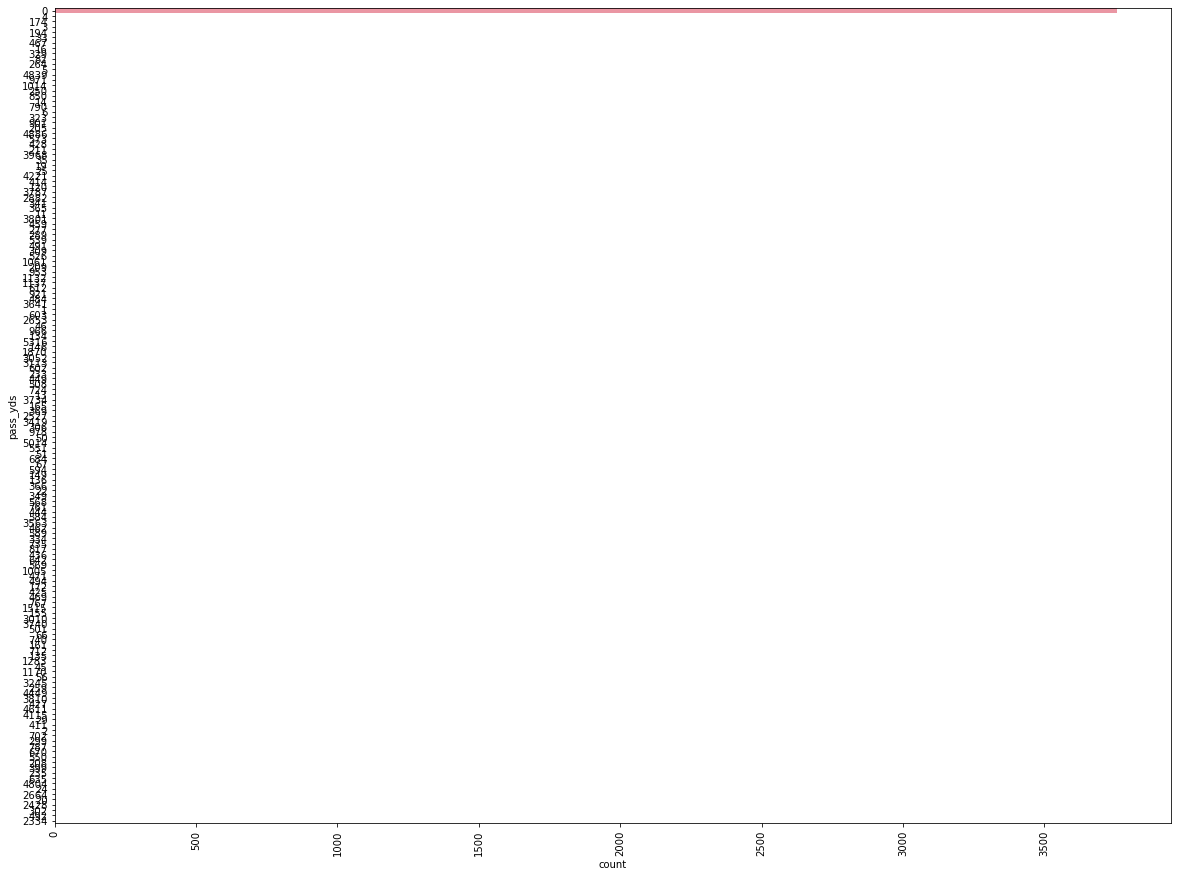

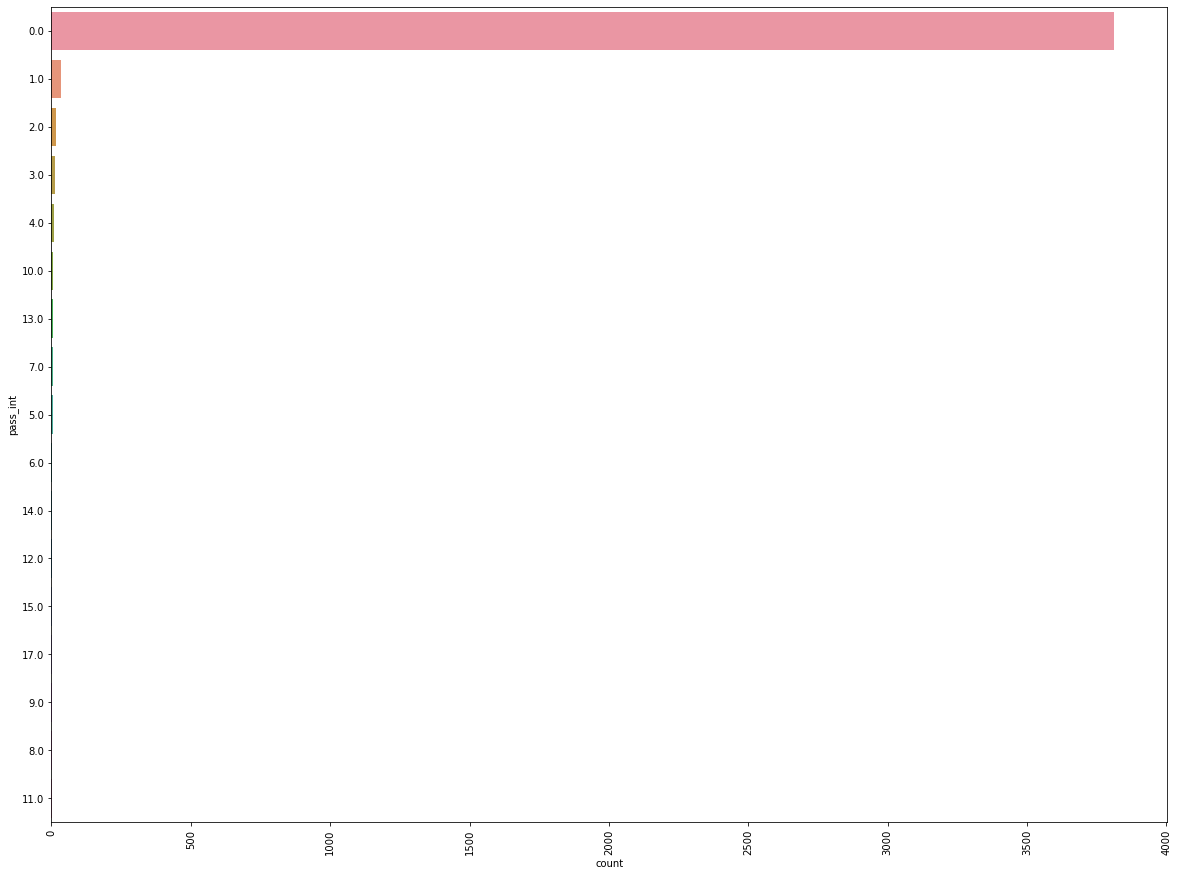

In [51]:
for col in cat:
    fig, ax = plt.subplots(figsize = (20,15))
    ax = sns.countplot(y = col, data=data,order=data[col].value_counts().index)
    ax.tick_params(axis='x', labelrotation = 90)
    plt.show()

In [56]:
data.drop(['pass_yds', 'pass_int'], axis=1, inplace=True)

In [57]:
data.reset_index(drop = True, inplace = True)

In [58]:
y = data['fpts']
x = data = data.drop(['fpts'], axis = 1)

In [59]:
numericals = data.select_dtypes(include = np.number)
categoricals = data.select_dtypes(include = np.object)

In [60]:
encoded = OneHotEncoder().fit_transform(categoricals).toarray()
encoded = pd.DataFrame(encoded)

In [61]:
normalized = Normalizer().fit_transform(numericals)
normalized = pd.DataFrame(normalized)

In [62]:
normalized

0         1         2         3         4         5         6  \
0     0.921290  0.388847  0.004559  0.000000  0.000000  0.000000  0.000000   
1     0.999567  0.029239  0.001487  0.000000  0.000000  0.000000  0.000000   
2     0.999736  0.022316  0.000992  0.000000  0.000000  0.000000  0.000992   
3     0.988592  0.150619  0.000491  0.000000  0.000000  0.000000  0.000000   
4     0.998796  0.048456  0.000494  0.000000  0.002967  0.000000  0.000000   
5     0.996860  0.078998  0.001481  0.004444  0.002469  0.000000  0.000000   
6     0.907046  0.420984  0.006283  0.000000  0.000000  0.000673  0.000000   
7     0.993523  0.113616  0.001476  0.000000  0.000000  0.000000  0.000000   
8     0.991566  0.126583  0.007850  0.000000  0.026494  0.000000  0.000000   
9     0.917171  0.398454  0.005446  0.000000  0.000000  0.000000  0.000454   
10    0.977689  0.210058  0.000484  0.000000  0.000000  0.000000  0.000000   
11    0.998889  0.046598  0.000496  0.000000  0.002479  0.000000  0.000000   
12    0.949734  0.312975  0.007049  0.000000  0.000000  0.000000  0.000470   
13    0.987302  0.158848  0.001466  0.000000  0.000000  0.000000  0.000000   
14    0.996711  0.080961  0.000494  0.000000  0.000000  0.000000  0.000000   
15    0.996551  0.082964  0.000988  0.000000  0.000000  0.000000  0.000000   
16    0.988591  0.150619  0.001472  0.000000  0.000000  0.000000  0.000000   
17    0.853845  0.520503  0.005070  0.000000  0.000000  0.000000  0.000000   
18    0.988708  0.149849  0.000979  0.000000  0.000000  0.000000  0.000000   
19    0.983948  0.178456  0.000488  0.000000  0.000000  0.000000  0.000000   
20    0.991476  0.130006  0.007849  0.000000  0.000000  0.000491  0.001472   
21    0.764881  0.644150  0.005299  0.000000  0.000000  0.000000  0.000000   
22    0.984748  0.173980  0.001466  0.000000  0.000000  0.000000  0.000000   
23    0.984397  0.175960  0.000489  0.000000  0.000000  0.000000  0.000000   
24    0.995863  0.090847  0.001481  0.000000  0.000000  0.000000  0.000494   
25    0.999282  0.036095  0.008406  0.000000  0.000000  0.006181  0.000000   
26    0.998818  0.048458  0.000989  0.000000  0.000000  0.000989  0.000000   
27    0.999192  0.040106  0.001485  0.000000  0.000000  0.000000  0.000000   
28    0.996501  0.083495  0.000494  0.000000  0.000000  0.000247  0.000000   
29    0.929403  0.023454  0.006898  0.367438  0.023913  0.000000  0.000000   
30    0.997578  0.030619  0.000988  0.062225  0.002469  0.000000  0.000000   
31    0.998231  0.005439  0.000989  0.058341  0.002967  0.000000  0.000000   
32    0.998969  0.041624  0.001487  0.017839  0.001982  0.000000  0.000000   
33    0.984749  0.173980  0.000977  0.000000  0.000000  0.000000  0.000000   
34    0.903438  0.428697  0.004023  0.000000  0.000000  0.000000  0.000000   
35    0.998665  0.002965  0.007906  0.049909  0.000494  0.000000  0.000000   
36    0.999918  0.003465  0.000990 -0.001485  0.000000  0.000000  0.000000   
37    0.999912  0.007429  0.000991  0.006934  0.000000  0.000000  0.000000   
38    0.999442  0.000992  0.001487  0.030737  0.000000  0.000000  0.000000   
39    0.999891  0.005955  0.000992  0.009924  0.000000  0.000000  0.000000   
40    0.999923  0.008937  0.000993  0.003972  0.000000  0.000000  0.000000   
41    0.780642  0.624977  0.001159  0.000000  0.000000  0.000000  0.000000   
42    0.997280  0.073671  0.001483  0.000000  0.000000  0.000000  0.000000   
43    0.909258  0.416162  0.007648  0.000000  0.000000  0.000900  0.000000   
44    0.993461  0.114157  0.000492  0.000000  0.000000  0.000000  0.000000   
45    0.991359  0.131166  0.001474  0.000000  0.000000  0.000000  0.000000   
46    0.998794  0.049024  0.001486  0.000000  0.000000  0.000990  0.000000   
47    0.944027  0.329779  0.007474  0.000000  0.000000  0.001401  0.000000   
48    0.931333  0.363593  0.007834  0.000000  0.018894  0.000000  0.000000   
49    0.991238  0.132067  0.000491  0.000000  0.001964  0.000000  0.000000   
50    0.853834  0.520496  0.005070 

In [63]:
# encoded

In [64]:
x_features = np.concatenate((normalized, encoded), axis = 1)
x_features = pd.DataFrame(x_features)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y, test_size = 0.75, random_state = 1000)

In [66]:
x_train.shape

(980, 61)

In [67]:
x_test.shape

(2942, 61)

In [68]:
y_test.shape

(2942,)

In [69]:
y_train.shape

(980,)

In [70]:
model = LinearRegression()  
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [71]:
predictions = model.predict(x_test)

In [72]:
x_test.head()

0         1         2        3        4         5         6   \
377   0.999074  0.042019  0.007910  0.00000  0.00000  0.000494  0.000494   
1427  0.998201  0.059270  0.007903  0.00000  0.00000  0.000247  0.000000   
694   0.999896  0.010890  0.001980  0.00297  0.00792  0.000000  0.000000   
243   0.985914  0.167253  0.000489  0.00000  0.00000  0.000000  0.000000   
446   0.984749  0.173980  0.000489  0.00000  0.00000  0.000000  0.000000   

            7         8         9    10   11   12   13   14   15   16   17  \
377   0.000494  0.000000  0.004647  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1427  0.000494  0.001482  0.004198  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
694   0.000000  0.000000  0.003663  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
243   0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
446   0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   

       18   19   20   21   22   23   24   25   26   27   28   29   30   31  \
377   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1427  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
694   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
243   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
446   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       32   33   34   35   36   37   38   39   40   41   42   43   44   45  \
377   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1427  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
694   0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
243   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
446   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       46   47   48   49   50   51   52   53   54   55   56   57   58   59  \
377   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1427  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
694   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
243   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
446   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       60  
377   0.0  
1427  0.0  
694   1.0  
243   0.0  
446   1.0

In [73]:
predictions

array([103.18041445,  98.21608118,  42.52181971, ...,  57.65557028,
       124.56037541,  10.50040342])

In [75]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, predictions))

Mean Absolute Error: 9.58028040584679
Mean Squared Error: 271.41804647719965
Root Mean Squared Error: 16.474769997702538
R2: 0.8156321407521729


Prior to cleaing after MVP model. The model was producing phenomanly, it was a sign for worry as it was over fitting with an R2 over 99 %.

In [76]:
from scipy.stats import boxcox
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.classifier import EnsembleVoteClassifier
# from mlxtend.data import iris_data

In [77]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(numericals)
x_standardized = transformer.transform(numericals)
x_standardized

array([[ 1.24469858,  1.44003165,  1.10860454, ...,  1.98376165,
        -0.22068792, -0.14627706],
       [-0.39566024, -0.83684968, -0.24710277, ..., -0.23158949,
        -0.22068792,  0.36249752],
       [-0.80574994, -0.8769962 , -0.44077524, ...,  1.98376165,
        -0.22068792,  1.42428795],
       ...,
       [-0.39566024, -0.20884337, -0.63444771, ..., -0.23158949,
        -0.22068792, -0.45596594],
       [ 1.24469858,  2.41501861,  2.27063937, ..., -0.23158949,
        -0.22068792, -0.72141355],
       [-1.62592935, -0.8110412 , -0.24710277, ..., -0.23158949,
        -0.22068792,  0.20765308]])

In [78]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(numericals)
x_normalized = transformer.transform(numericals)
x_normalized

array([[9.21289600e-01, 3.88847120e-01, 4.55858288e-03, ...,
        4.55858288e-04, 0.00000000e+00, 1.54991818e-03],
       [9.99567361e-01, 2.92387081e-02, 1.48671397e-03, ...,
        0.00000000e+00, 0.00000000e+00, 2.82475655e-03],
       [9.99736311e-01, 2.23155426e-02, 9.91801896e-04, ...,
        4.95900948e-04, 0.00000000e+00, 5.20695995e-03],
       ...,
       [9.90633803e-01, 1.36537530e-01, 4.91142193e-04, ...,
        0.00000000e+00, 0.00000000e+00, 9.82284386e-04],
       [8.61135417e-01, 5.08329813e-01, 6.81749959e-03, ...,
        0.00000000e+00, 0.00000000e+00, 3.40874980e-04],
       [9.98856679e-01, 3.37250517e-02, 1.48786993e-03, ...,
        0.00000000e+00, 0.00000000e+00, 2.47978321e-03]])

In [79]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(numericals)
x_min_max = transformer.transform(numericals)
x_min_max

array([[1.        , 0.44444444, 0.5625    , ..., 0.125     , 0.        ,
        0.19708029],
       [0.42857143, 0.03025561, 0.125     , ..., 0.        , 0.        ,
        0.25304136],
       [0.28571429, 0.02295253, 0.0625    , ..., 0.125     , 0.        ,
        0.36982968],
       ...,
       [0.42857143, 0.14449661, 0.        , ..., 0.        , 0.        ,
        0.16301703],
       [1.        , 0.6218049 , 0.9375    , ..., 0.        , 0.        ,
        0.13381995],
       [0.        , 0.03495044, 0.125     , ..., 0.        , 0.        ,
        0.23600973]])

Text(0.5, 1.0, 'rk (Normalized)')

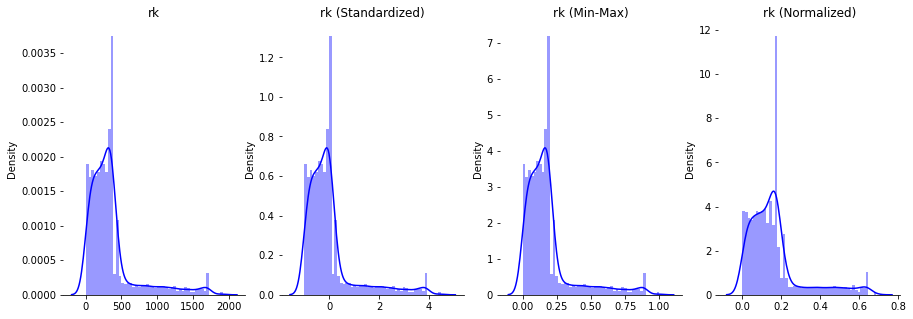

In [89]:
f, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=False)
sns.despine(left=True)

col = (1)

sns.distplot(numericals.values[:,col], kde=True, color="b", ax=axes[0])
sns.distplot(x_standardized[:,col], kde=True, color="b", ax=axes[1])
sns.distplot(x_min_max[:,col], kde=True, color="b", ax=axes[2])
sns.distplot(x_normalized[:,col], kde=True, color="b", ax=axes[3])

axes[0].set_title(f'{numericals.columns[col]}')
axes[1].set_title(f'{numericals.columns[col]} (Standardized)')
axes[2].set_title(f'{numericals.columns[col]} (Min-Max)')
axes[3].set_title(f'{numericals.columns[col]} (Normalized)')

### KNN

In [97]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=10)
model.fit(x_train, y_train)

predictions = model.predict(x_test)
score = model.score(x_test, y_test)

from sklearn import linear_model
from sklearn.metrics import r2_score
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
#predictions  = lm.predict(x_test)
r2_score(y_test, predictions)

0.39811383484366303

Text(0, 0.5, 'Accuracy')

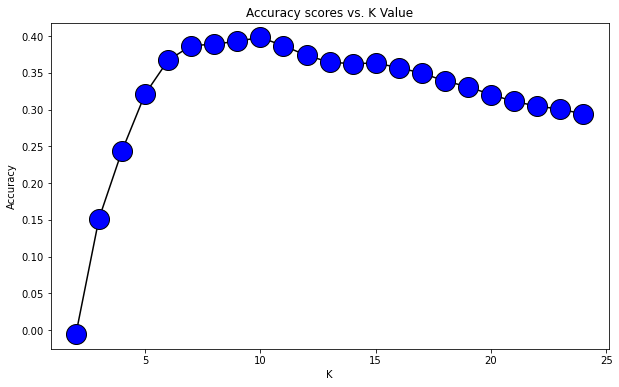

In [98]:
from sklearn.neighbors import KNeighborsRegressor
scores = []
for i in range(2,25):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))


plt.figure(figsize=(10,6))
plt.plot(range(2,25),scores,color = 'black',linestyle='solid', 
         marker='o',markerfacecolor='blue', markersize=20)
plt.title('Accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

# Random Forest

In [99]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor() 

In [100]:
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test) 

In [101]:
y_pred

array([152.1708, 136.9365,  27.774 , ...,  32.2335, 131.634 ,   6.415 ])

In [105]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE:  0.9969760027192381
MSE:  25.315820461420792
Root Mean Squared Error: 5.0314829286623635
R2: 0.9828035619438202


In [103]:
# 200, 500, 1000, 1500 = n estimators

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
# random_forest_tuning = RandomForestRegressor()
# param_grid = {
#    'n_estimators': [200, 500, 1000, 1500],
#     'min_samples_split': [2,20],
#     'min_samples_leaf': [1,10],
#    'max_depth' : [4,5,6,7,8],
#    'criterion' :['mse', 'mae',]
# }
# GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5)
# GSCV.fit(x_train, y_train)
# GSCV.best_params_ 

In [108]:
random_forest = RandomForestRegressor(max_depth = 8, min_samples_leaf = 1, min_samples_split=2, n_estimators=500)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE:  1.079877026036259
MSE:  27.226574276363095
Root Mean Squared Error: 5.217908994641732
R2: 0.9815056320714964


In [ ]:
new_pred = random_forest.predict(x_new)